In [17]:
import numpy as np
import librosa
import librosa.display
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [18]:
SR = 22050          # Sample rate
DURATION = 1       # Duration of audio segment to process (in seconds)
N_MFCC = 20         # Number of MFCCs to extract (matches your original code)
HOP_LENGTH_MFCC = 512 # Hop length for MFCC calculation

In [19]:
ds = glob('mswc_microset/mswc_microset/*/clips/*/*.opus')

In [20]:
file_num_1, file_num_2 = 5, 10 # Choose two different file indices from your dataset

file1_path = ds[file_num_1]
file2_path = ds[file_num_2]

print(f"Processing File 1: {file1_path}")
print(f"Processing File 2: {file2_path}")

Processing File 1: mswc_microset/mswc_microset\en\clips\backward\common_voice_en_18854341.opus
Processing File 2: mswc_microset/mswc_microset\en\clips\backward\common_voice_en_19814783.opus


In [21]:
y1, sr1 = librosa.load(file1_path, sr=SR, duration=DURATION)
y2, sr2 = librosa.load(file2_path, sr=SR, duration=DURATION)

if len(y1) < SR * DURATION:
    y1 = np.pad(y1, (0, max(0, int(SR * DURATION) - len(y1))))
if len(y2) < SR * DURATION:
    y2 = np.pad(y2, (0, max(0, int(SR * DURATION) - len(y2))))


In [22]:
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=N_MFCC, hop_length=HOP_LENGTH_MFCC)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=N_MFCC, hop_length=HOP_LENGTH_MFCC)

n_coeffs, n_frames1 = mfccs1.shape
_, n_frames2 = mfccs2.shape

In [23]:
max_frames = max(n_frames1, n_frames2)
mfccs1_padded = np.pad(mfccs1, ((0, 0), (0, max_frames - n_frames1)), mode='constant')
mfccs2_padded = np.pad(mfccs2, ((0, 0), (0, max_frames - n_frames2)), mode='constant')

Saving MFCC animation as GIF...
MFCC animation saved.


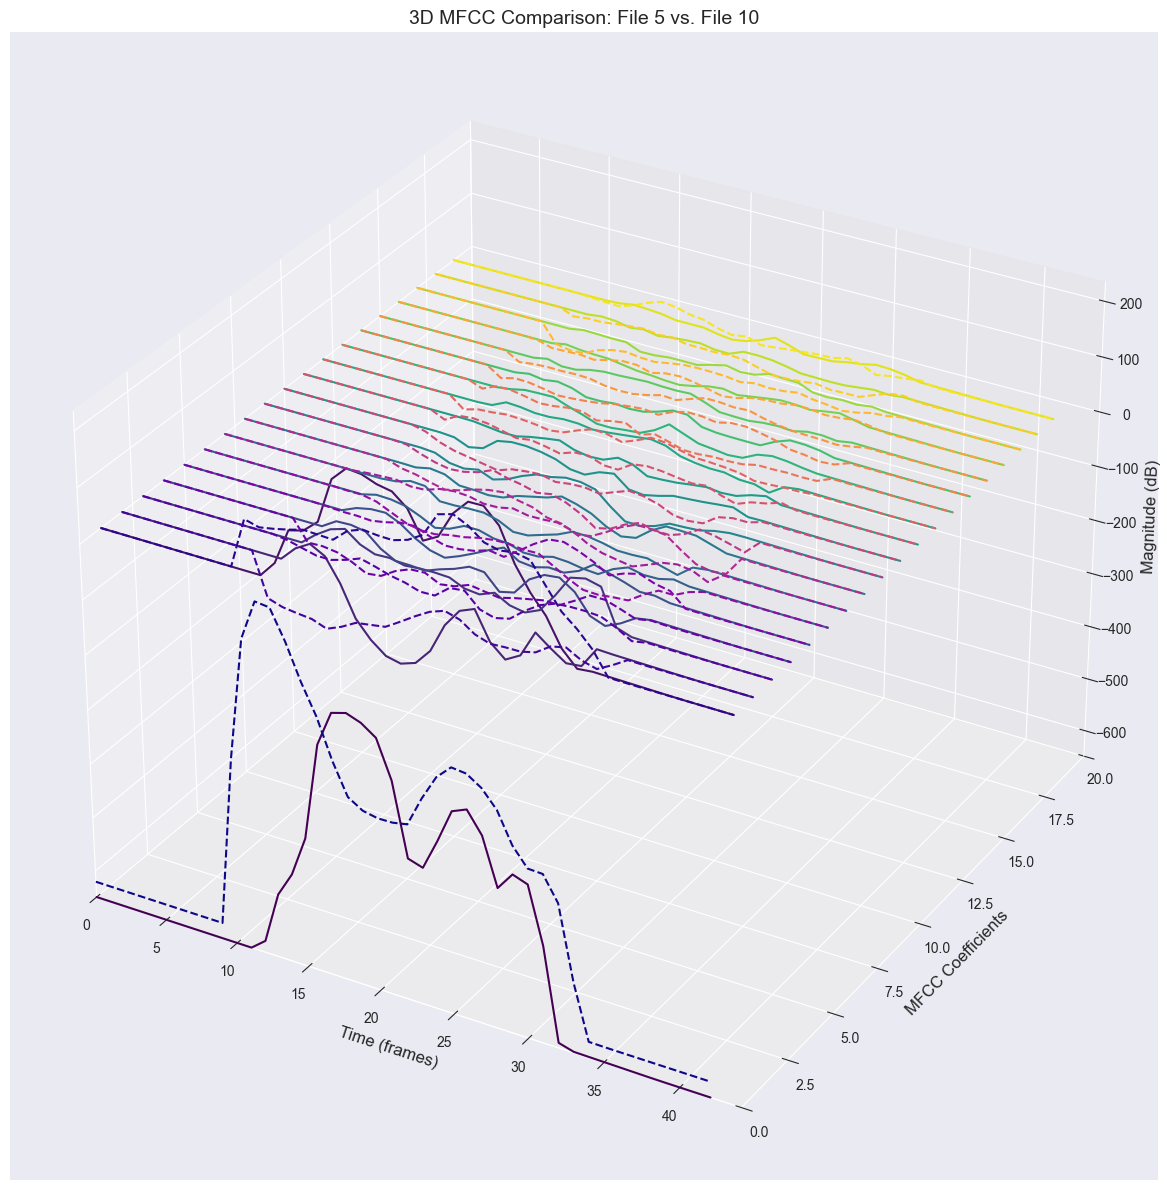

In [24]:
time = np.arange(max_frames)
coeffs = np.arange(n_coeffs)

fig = plt.figure(figsize=(18, 12)) # Adjusted figure size for consistency
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Time (frames)', fontsize=12) # Increased fontsize for consistency
ax.set_ylabel('MFCC Coefficients', fontsize=12)
ax.set_zlabel('Magnitude (dB)', fontsize=12) # MFCCs are not strictly dB, but common visualization
ax.set_title(f'3D MFCC Comparison: File {file_num_1} vs. File {file_num_2}', fontsize=14) # Adjusted title

ax.set_xlim(0, max_frames)
ax.set_ylim(0, n_coeffs)
ax.set_zlim(min(mfccs1_padded.min(), mfccs2_padded.min()), max(mfccs1_padded.max(), mfccs2_padded.max()))

# Create empty lines for each MFCC coefficient for both files
lines1 = [ax.plot([], [], [], lw=1.5, color=plt.cm.viridis(i / n_coeffs),
       label=f'MFCC {i+1} (File {file_num_1})')[0] for i in coeffs]
lines2 = [ax.plot([], [], [], lw=1.5, linestyle='--', color=plt.cm.plasma(i / n_coeffs),
       label=f'MFCC {i+1} (File {file_num_2})')[0] for i in coeffs]

# Add legend (only a subset for clarity, or consider a separate legend for each file)
# If you have many coefficients (e.g., n_mfcc=40), the legend can get very crowded.
# ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=8) # Uncomment if you want a legend

# Animation function
def update(frame):
    for i, (line1, line2) in enumerate(zip(lines1, lines2)):
        # Update data up to the current frame
        line1.set_data(time[:frame], np.ones(frame) * i)
        line1.set_3d_properties(mfccs1_padded[i, :frame]) # Use padded data
        line2.set_data(time[:frame], np.ones(frame) * i)
        line2.set_3d_properties(mfccs2_padded[i, :frame]) # Use padded data
    return lines1 + lines2

# Animate
# Reduce frames for faster GIF generation if needed (e.g., frames=range(0, max_frames, 5))
ani = FuncAnimation(
fig, update, frames=max_frames, interval=50, blit=False
)

# Save as GIF (requires `pillow`)
print("Saving MFCC animation as GIF...")
ani.save('3d_mfcc_comparison_animation.gif', writer='pillow', fps=15, dpi=100)
print("MFCC animation saved.")

# Alternatively, save as MP4 (requires `ffmpeg`)
# ani.save('bilingual_mfcc_comparison.mp4', writer='ffmpeg', fps=15)

plt.tight_layout()
plt.show()